# Capstone Project - A 'New-style' Classical Music Festival
### Applied Data Science Capstone by Coursera/IBM

## Table of contents
1. [Introduction](#intro)
2. [Data](#data)
3. [Methodology](#method)
4. [Results](#results)
5. [Discussion](#discussion)
6. [Conclusion](#conclusion)


### 1. Introduction <a name="intro"></a>

The benefits of listening to classical music are endless. It can improve your mood, lower stress levels, increase productivity, spark creativity, and studies have shown it can even boost your brain power by improving memory. However, classical music has a diversity problem. It is far too white and far too inaccessible to a lot of people. More needs to be done to take classical music out of the traditional concert hall and brought to a much wider range of communities, to make it more accessible to all, and to break down the barriers and stereotypes surrounding the genre.

Through combining demographic data collected by Greater London Authority in 2016, and Foursquare location data, this project aims to highlight potential areas and venues in London that could host a ‘New-style’ Classical Music Festival. It should appeal to any philanthropist wanting to increase the outreach of classical music.


### 2. Data <a name="data"></a>

- Kaggle data set on London Boroughs from study conducted by GLA in 2016 which can be found [here](https://www.kaggle.com/marshald/london-boroughs).

- Geopy library to get the latitude and longitude values of London Boroughs

- Foursquare API to get location and venue data for potential concert venues


**London Boroughs Kaggle data set**

First I will import the relevant libraries needed for downloading and cleaning the data.


In [1]:
import types
import pandas as pd
import numpy as np
import requests

The next hidden cell will contain my IMB cloud storage credentials where I have saved the London Borough data set downloaded from Kaggle. It will be saved as a csv file with the file path attributed to 'body'.

In [2]:
from botocore.client import Config
import ibm_boto3
def __iter__(self): return 0

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_964e11cb060e41eea6fe04e63f5b0d82 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FPKzmk_6b02QQmtp8exQr3G1kgG9CN9UaLiTbDFJrHxl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_964e11cb060e41eea6fe04e63f5b0d82.get_object(Bucket='capstoneproject-donotdelete-pr-wp7lbpbcbiixoy',Key='LondonBoroughs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [3]:
#read the csv into a pandas df and print head
df = pd.read_csv(body)
df.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2016,GLA Household Estimate 2016,Inland Area (Hectares),Population density (per hectare) 2016,"Average Age, 2016","Proportion of population aged 0-15, 2016",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2014/15,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,E09000001,City of London,Inner London,"8,548","5,179",290.4,28.9,42.9,27.2,...,5.99,5.57,NaN,2.6,128.8,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,"205,773","76,841","3,610.8",57.3,32.9,21.0,...,7.05,3.05,25.3,7.3,227.6,Lab,0.0,100.0,0.0,36.5
3,E09000003,E09000003,Barnet,Outer London,"385,108","149,147","8,674.8",44.5,37.2,21.0,...,7.37,2.75,18.4,6.0,133.8,Cons,50.8,47.6,1.6,40.5
4,E09000004,E09000004,Bexley,Outer London,"243,303","97,233","6,058.1",39.9,38.9,20.8,...,7.21,3.29,21.4,6.9,164.3,Cons,71.4,23.8,0.0,39.6


I can see that there are a lot of columns that will not be relevant to this project so I will create a new df containing only the relevant columns.

In [4]:
#select columns of interest

wanted_columns=['Area name', 'Inner/ Outer London', 'GLA Population Estimate 2016', 
                'Average Age, 2016', 'Proportion of population of working-age, 2016', 
                'Proportion of population aged 65 and over, 2016', '% of population from BAME groups (2016)' 
                ]

df2 = df.loc[:, wanted_columns]
df2.head()

,Area name,Inner/ Outer London,GLA Population Estimate 2016,"Average Age, 2016","Proportion of population of working-age, 2016","Proportion of population aged 65 and over, 2016",% of population from BAME groups (2016)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,City of London,Inner London,"8,548",42.9,90.6,9.4,27.5
2,Barking and Dagenham,Outer London,"205,773",32.9,86.1,13.9,49.5
3,Barnet,Outer London,"385,108",37.2,83.3,16.7,38.7
4,Bexley,Outer London,"243,303",38.9,89.0,11.0,21.4


I can also see that there are some NaN and missing values stored as '.' I will convert all NaN and missing values to numpy NaN for easier replacement and then create a df to see where all of the missing values are.

In [5]:
#clean data by converting any missing values to numpy NaN
df2.replace('NaN', np.nan, inplace = True)
df2.replace('.', np.nan, inplace = True)

#create data frame to see where na values are
dfna = df2[df2.isna().any(axis=1)]
dfna

,Area name,Inner/ Outer London,GLA Population Estimate 2016,"Average Age, 2016","Proportion of population of working-age, 2016","Proportion of population aged 65 and over, 2016",% of population from BAME groups (2016)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Inner London,NaN,"3,494,269",34.5,91.0,9.0,43.1
35,Outer London,NaN,"5,256,484",36.8,86.8,13.2,42.1
36,London,NaN,"8,750,753",35.9,88.5,11.5,42.5
37,England,NaN,"54,316,618",39.6,32.2,17.7,NaN
38,United Kingdom,NaN,"64,596,752",39.8,32.2,17.6,NaN
39,National comparator,NaN,"54,316,618",39.8,32.2,17.7,NaN


I don't want to lose the boroughs which have some nan values which in this case are 'City of London', 'Hounslow', and 'Kensington and Chelsea', so can filter the NaNs out on the subset 'Inner/Outer London'

In [6]:
df2.dropna(subset=['Inner/ Outer London'], axis=0, inplace=True)
df2.reset_index(drop=True, inplace = True)

In [7]:
#check column types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
Area name                                          33 non-null object
Inner/ Outer London                                33 non-null object
GLA Population Estimate 2016                       33 non-null object
Average Age, 2016                                  33 non-null float64
Proportion of population of working-age, 2016      33 non-null float64
Proportion of population aged 65 and over, 2016    33 non-null float64
% of population from BAME groups (2016)            33 non-null object
dtypes: float64(3), object(4)
memory usage: 1.9+ KB


In [8]:
#convert columns of type object to integers and floats

df2['GLA Population Estimate 2016'] = df2['GLA Population Estimate 2016'].str.replace(',', '')
df2['GLA Population Estimate 2016'] = df2['GLA Population Estimate 2016'].astype(int)

df2['% of population from BAME groups (2016)'] = df2['% of population from BAME groups (2016)'].astype(float)

In [9]:
#rename columns
df2.rename(columns={'GLA Population Estimate 2016':'Population', 'Average Age, 2016':'Average Age', 'Proportion of population of working-age, 2016':'% working-age',
                    'Proportion of population aged 65 and over, 2016':'% 65+', '% of population from BAME groups (2016)': '% BAME', 'Gross Annual Pay, (2015)':'Gross Annual Pay (2015) £'}, inplace=True)

#set 'Area Name' as index for easier locating of rows
df2.set_index('Area name', inplace =True)

#print head of cleaned dataframe
df2.head()

,Inner/ Outer London,Population,Average Age,% working-age,% 65+,% BAME
Area name,,,,,,
City of London,Inner London,8548,42.9,90.6,9.4,27.5
Barking and Dagenham,Outer London,205773,32.9,86.1,13.9,49.5
Barnet,Outer London,385108,37.2,83.3,16.7,38.7
Bexley,Outer London,243303,38.9,89.0,11.0,21.4
Brent,Outer London,328568,35.5,82.5,17.5,64.9


**Geopy Library to get location data**

In [10]:
#install the library
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

In [11]:
#create list of London Boroughs from index of df
AreaList = df2.index.tolist()

#create for loop to run through list of boroughs and perform search for latitude and longitude coordinates
latitudes=[]
longitudes=[]
for i in AreaList:
    address = i+', London'
    geolocator = Nominatim(user_agent="ldn_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    latitudes.append(latitude)
    longitudes.append(longitude)

#add latitudes and longitudes list to data frame    
df2['latitude'] = latitudes
df2['longitude'] = longitudes
df2.head()

,Inner/ Outer London,Population,Average Age,% working-age,% 65+,% BAME,latitude,longitude
Area name,,,,,,,,
City of London,Inner London,8548,42.9,90.6,9.4,27.5,51.515618,-0.091998
Barking and Dagenham,Outer London,205773,32.9,86.1,13.9,49.5,51.554117,0.150504
Barnet,Outer London,385108,37.2,83.3,16.7,38.7,51.653090,-0.200226
Bexley,Outer London,243303,38.9,89.0,11.0,21.4,51.441679,0.150488
Brent,Outer London,328568,35.5,82.5,17.5,64.9,51.563826,-0.275760


### 3. Methodology <a name="method"></a>

In this project, I will focus on boroughs that are within ‘Inner London’ and have a high BAME population percentage. I have chosen to focus on Inner London only as it will be more accessible via public transport and will therefore likely increase attendance figures, and I have chosen to focus on areas with a high BAME population to address the diversity problem that classical music has.

Within these boroughs, I will search for venues that fall under the category ‘event space’ and are described as community centres/town halls, to highlight potential performance venues that wouldn't necessarily be usually considered as classical music performance spaces. Thereby, potentially reaching new audience members and breaking down barriers and stereotypes of where classical music can be performed.

First, I will do some data visualisation to explore the dataset and highlight the areas of interest.


In [12]:
#import matplotlib visualisation library
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['seaborn-muted'])

#backend to show figures in notebook
%matplotlib inline

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


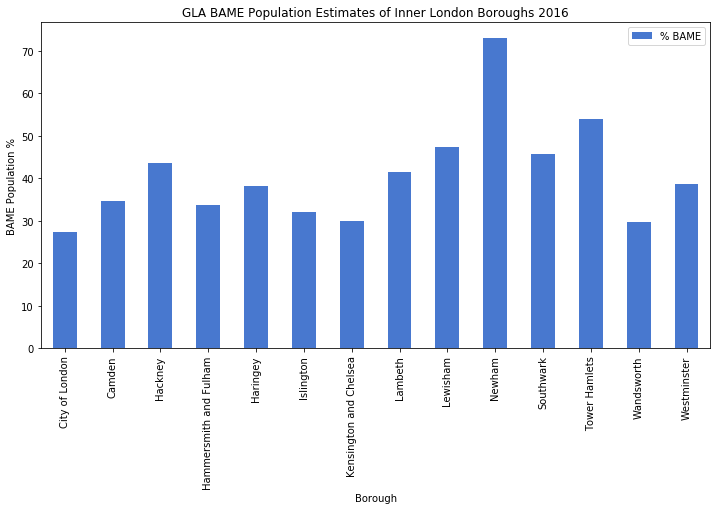

In [13]:
#select only Inner London Boroughs from data frame
InnerLDN =  df2['Inner/ Outer London']=='Inner London'
InnerLDN_df = df2[InnerLDN]

#drop all columns apart from % BAME
InnerLDN_df.drop(['Inner/ Outer London','Population', 'Average Age','% working-age', '% 65+', 'latitude', 'longitude'], axis=1, inplace = True)

#plot bar chart
InnerLDN_df.plot(kind='bar', figsize=(12,6))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('BAME Population %') # add y-label to the plot
plt.title('GLA BAME Population Estimates of Inner London Boroughs 2016') # add title to the plot

plt.show()

As we can see from this chart, Newham, Tower Hamlets and Lewisham are the top 3 boroughs with the highest BAME population, so these will be our focus areas. 

I will use folium to plot these boroughs on a map.



In [14]:
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

In [15]:
df3 = df2.loc[['Newham','Tower Hamlets','Lewisham']]

In [16]:
#creating new df of just 3 boroughs of interest
df3 = df2.loc[['Newham','Tower Hamlets','Lewisham']]

#using geopy to get London coordinates
address = 'London'
geolocator = Nominatim(user_agent="ldn_explorer")
LDNlocation = geolocator.geocode(address)
LDNlat = LDNlocation.latitude
LDNlong = LDNlocation.longitude

ldn_map = folium.Map(location=[LDNlat, LDNlong], zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
markers = folium.map.FeatureGroup()

# loop through the boroughs and add each to the incidents feature group
for lat, lng, in zip(df3.latitude, df3.longitude):
    markers.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=10, 
            color='purple',
            fill=True,
            fill_color='purple',
            fill_opacity=0.6
        )
    )
    
# add pop-up text to each marker on the map
latitudes = df3.latitude.tolist()
longitudes = df3.longitude.tolist()
AreaList2 = df3.index.tolist()
for lat, lng, label in zip(latitudes, longitudes, AreaList2):
    folium.Marker([lat, lng], popup=label).add_to(ldn_map)    
    

# add markers to map
ldn_map.add_child(markers)

### Foursquare API
I will now use Foursquare API to search for potential performance venues in each of these boroughs. The next hidden cell will contain my personal foursquare credentials.

In [17]:
# The code was removed by Watson Studio for sharing.

In [18]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

**a) Newham**

In [19]:
Newham_lat = df3.loc['Newham','latitude']
Newham_long = df3.loc['Newham','longitude']

search_query = 'hall'
radius = 1000
LIMIT = 50
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, Newham_lat, Newham_long, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']

In [20]:
# tranform venues into a dataframe
Newham_df = json_normalize(venues)

#keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in Newham_df.columns if col.startswith('location.')] + ['id']
Newham_filtered = Newham_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
Newham_filtered['categories'] = Newham_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
Newham_filtered.columns = [column.split('.')[-1] for column in Newham_filtered.columns]

Newham_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Olga turl memorial hall,Event Space,"Barking Rd, London Borough of Newham, London E13",GB,London,United Kingdom,NaN,647,"[Barking Rd, London Borough of Newham, London ...","[{'label': 'display', 'lat': 51.52429375219513...",51.524294,0.027506,E13,Greater London,4f51d6d7e4b0ee60b84f3d66
1,Lawrence Hall,Assisted Living,Cumberland Road,GB,PLAISTOW,United Kingdom,NaN,839,"[Cumberland Road, Plaistow, Greater London, E1...","[{'label': 'display', 'lat': 51.522873, 'lng':...",51.522873,0.025371,E13 8NH,Greater London,580a534338fad048aa9109ef
2,Latimer Hall,Non-Profit,Cleves Road,GB,London,United Kingdom,East Ham,875,"[Cleves Road (East Ham), London, Greater Londo...","[{'label': 'display', 'lat': 51.533172, 'lng':...",51.533172,0.040893,E6 1QF,Greater London,51f0e4a6498e9f95aa2eb38b
3,St Cedd's Hall,Community Center,Foster Road,GB,London,United Kingdom,NaN,910,"[Foster Road, London, Greater London, E13 8SR,...","[{'label': 'display', 'lat': 51.523727, 'lng':...",51.523727,0.020876,E13 8SR,Greater London,57534a03498e1e95a37a6f9c
4,Main Hall,College Auditorium,NewVic College,GB,London,United Kingdom,NaN,934,"[NewVic College, London, Greater London, Unite...","[{'label': 'display', 'lat': 51.521646, 'lng':...",51.521646,0.030683,NaN,Greater London,5141bde9e4b006b2c956c810
5,Full Gospel Hall,Church,NaN,GB,Stratford,United Kingdom,NaN,1019,"[Stratford, Greater London, United Kingdom]","[{'label': 'display', 'lat': 51.537255, 'lng':...",51.537255,0.038296,NaN,Greater London,4e47b571aeb70e74f4a5476a


Looking at this data frame it is clear to see that some results would not be appropriate venues from their category type. I will select the top 3 most suitable.

In [21]:
#select top 3 most suitable venues by analysing category type
Newham_filtered.drop([1,2,4], inplace = True)
Newham_filtered.reset_index(drop=True, inplace=True)

In [22]:
Newham_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Olga turl memorial hall,Event Space,"Barking Rd, London Borough of Newham, London E13",GB,London,United Kingdom,NaN,647,"[Barking Rd, London Borough of Newham, London ...","[{'label': 'display', 'lat': 51.52429375219513...",51.524294,0.027506,E13,Greater London,4f51d6d7e4b0ee60b84f3d66
1,St Cedd's Hall,Community Center,Foster Road,GB,London,United Kingdom,NaN,910,"[Foster Road, London, Greater London, E13 8SR,...","[{'label': 'display', 'lat': 51.523727, 'lng':...",51.523727,0.020876,E13 8SR,Greater London,57534a03498e1e95a37a6f9c
2,Full Gospel Hall,Church,NaN,GB,Stratford,United Kingdom,NaN,1019,"[Stratford, Greater London, United Kingdom]","[{'label': 'display', 'lat': 51.537255, 'lng':...",51.537255,0.038296,NaN,Greater London,4e47b571aeb70e74f4a5476a


**b) Tower Hamlets**

In [23]:
TowerHamlets_lat = df3.loc['Tower Hamlets','latitude']
TowerHamlets_long = df3.loc['Tower Hamlets','longitude']
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, TowerHamlets_lat, TowerHamlets_long, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']

In [24]:
# tranform venues into a dataframe
TowerHamlets_df = json_normalize(venues)

#keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in TowerHamlets_df.columns if col.startswith('location.')] + ['id']
TowerHamlets_filtered = TowerHamlets_df.loc[:, filtered_columns]

# filter the category for each row
TowerHamlets_filtered['categories'] = TowerHamlets_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
TowerHamlets_filtered.columns = [column.split('.')[-1] for column in TowerHamlets_filtered.columns]

TowerHamlets_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Great Hall,College Auditorium,"Queen Mary, University of London",GB,Poplar,United Kingdom,NaN,574,"[Queen Mary, University of London, Poplar, Gre...","[{'label': 'display', 'lat': 51.52303236173254...",51.523032,-0.040756,NaN,Greater London,4d95c6dfaf3d236a3fecf8c6
1,Raglan Hall Hotel,None,NaN,GB,NaN,United Kingdom,NaN,943,[United Kingdom],"[{'label': 'display', 'lat': 51.52425163096107...",51.524252,-0.047025,NaN,NaN,4fc3e524e4b07a4ede61768b
2,Bromley Public Hall,City Hall,Bow road,GB,London,United Kingdom,NaN,972,"[Bow road, London, Greater London, E3 3aa, Uni...","[{'label': 'display', 'lat': 51.52797116576331...",51.527971,-0.020063,E3 3aa,Greater London,4c17990f216fc9b623a78f96
3,Low Hall Nursery,None,NaN,GB,NaN,United Kingdom,NaN,980,[United Kingdom],"[{'label': 'display', 'lat': 51.522667, 'lng':...",51.522667,-0.046913,NaN,NaN,4fbe7473e4b0accea60c42dd
4,LSE Rosebery Hall,None,90 roseberry avenue,GB,London,United Kingdom,NaN,1001,"[90 roseberry avenue, London, Greater London, ...","[{'label': 'display', 'lat': 51.52177522311313...",51.521775,-0.046649,NaN,Greater London,4f3661fd754a71c7141e1f0c
5,Grove Hall Park,Park,NaN,GB,NaN,United Kingdom,NaN,1021,[United Kingdom],"[{'label': 'display', 'lat': 51.5292240041289,...",51.529224,-0.020018,NaN,NaN,4b88186bf964a52071df31e3
6,Sir John Cass School Sports Hall,Basketball Court,Stephen Way,GB,London,United Kingdom,Bromley St,1327,"[Stephen Way (Bromley St), London, Greater Lon...","[{'label': 'display', 'lat': 51.51555133339506...",51.515551,-0.043840,E1 ORG,Greater London,519e5173498e323cc778e1d8
7,All Hallows church,Church,Bow,GB,NaN,United Kingdom,NaN,128,"[Bow, United Kingdom]","[{'label': 'display', 'lat': 51.52483085031972...",51.524831,-0.034932,NaN,NaN,4ef461cf30f87cc517c28004
8,Hallam Hotel,None,12 hallam street,GB,Greater London,United Kingdom,NaN,995,"[12 hallam street, Greater London, United King...","[{'label': 'display', 'lat': 51.52178857444303...",51.521789,-0.046563,NaN,Greater London,4f2a7334d5fbd0f5fd23a55a


In [25]:
#select top 3 most suitable venues by analysing category type
TowerHamlets_filtered.drop([0,1,3,5,6,8], inplace = True)
TowerHamlets_filtered.reset_index(drop=True, inplace = True)

In [26]:
TowerHamlets_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Bromley Public Hall,City Hall,Bow road,GB,London,United Kingdom,NaN,972,"[Bow road, London, Greater London, E3 3aa, Uni...","[{'label': 'display', 'lat': 51.52797116576331...",51.527971,-0.020063,E3 3aa,Greater London,4c17990f216fc9b623a78f96
1,LSE Rosebery Hall,None,90 roseberry avenue,GB,London,United Kingdom,NaN,1001,"[90 roseberry avenue, London, Greater London, ...","[{'label': 'display', 'lat': 51.52177522311313...",51.521775,-0.046649,NaN,Greater London,4f3661fd754a71c7141e1f0c
2,All Hallows church,Church,Bow,GB,NaN,United Kingdom,NaN,128,"[Bow, United Kingdom]","[{'label': 'display', 'lat': 51.52483085031972...",51.524831,-0.034932,NaN,NaN,4ef461cf30f87cc517c28004


**c) Lewisham**

In [27]:
Lewisham_lat = df3.loc['Lewisham','latitude']
Lewisham_long = df3.loc['Lewisham','longitude']
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, Lewisham_lat, Lewisham_long, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']


In [28]:
# tranform venues into a dataframe
Lewisham_df = json_normalize(venues)

#keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in Lewisham_df.columns if col.startswith('location.')] + ['id']
Lewisham_filtered = Lewisham_df.loc[:, filtered_columns]

# filter the category for each row
Lewisham_filtered['categories'] = Lewisham_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
Lewisham_filtered.columns = [column.split('.')[-1] for column in Lewisham_filtered.columns]

Lewisham_filtered


,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,L&Q - Kings Hall Mews,Office,NaN,GB,London,United Kingdom,338,"[Lewisham, Greater London, United Kingdom]","[{'label': 'display', 'lat': 51.46534882148976...",51.465349,-0.011513,NaN,Greater London,4ea1685ef5b96e3ac32d368f
1,Kingswood Halls,Event Space,"Kingswood Pl., Dacre Pk.",GB,London,United Kingdom,918,"[Kingswood Pl., Dacre Pk., Lewisham, Greater L...","[{'label': 'display', 'lat': 51.461579, 'lng':...",51.461579,0.003035,SE13 5BU,Greater London,4c6fd7749375a09338ff0437
2,Mehfil Hall,Event Space,NaN,GB,NaN,United Kingdom,1044,[United Kingdom],"[{'label': 'display', 'lat': 51.47060775756836...",51.470608,-0.017528,NaN,NaN,520cf9ea11d2f5de5bb160b9
3,St Swithuns Hall,Event Space,St Swithuns Rd,GB,NaN,United Kingdom,1055,"[St Swithuns Rd, United Kingdom]","[{'label': 'display', 'lat': 51.453275, 'lng':...",51.453275,-0.006207,NaN,NaN,4fbf58c4e4b0c6b44104c00a
4,Lochaber Hall,General Entertainment,Manor Lane Terrace,GB,London,United Kingdom,1071,"[Manor Lane Terrace, Lewisham, Greater London,...","[{'label': 'display', 'lat': 51.45705054946719...",51.457051,0.002678,Se13 5QL,Greater London,4b6183fcf964a52067162ae3
5,St Swithun's Church Hall,None,NaN,GB,London,United Kingdom,1137,"[London, Greater London, United Kingdom]","[{'label': 'display', 'lat': 51.4523735, 'lng'...",51.452374,-0.007214,NaN,Greater London,5549c4f7498e5c8428b6533e
6,St Swithun's Church,Church,191 Hither Green Lane,GB,Hither Green,United Kingdom,1138,"[191 Hither Green Lane, Hither Green, Greater ...","[{'label': 'display', 'lat': 51.45246033626532...",51.452460,-0.006490,SE13 6QE,Greater London,4bfd6930b68d0f47d9bee857


In [29]:
#select top 3 most suitable venues by analysing category type
Lewisham_filtered.drop([0,4,5,6], inplace = True)
Lewisham_filtered.reset_index(drop=True, inplace=True)

In [30]:
Lewisham_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Kingswood Halls,Event Space,"Kingswood Pl., Dacre Pk.",GB,London,United Kingdom,918,"[Kingswood Pl., Dacre Pk., Lewisham, Greater L...","[{'label': 'display', 'lat': 51.461579, 'lng':...",51.461579,0.003035,SE13 5BU,Greater London,4c6fd7749375a09338ff0437
1,Mehfil Hall,Event Space,NaN,GB,NaN,United Kingdom,1044,[United Kingdom],"[{'label': 'display', 'lat': 51.47060775756836...",51.470608,-0.017528,NaN,NaN,520cf9ea11d2f5de5bb160b9
2,St Swithuns Hall,Event Space,St Swithuns Rd,GB,NaN,United Kingdom,1055,"[St Swithuns Rd, United Kingdom]","[{'label': 'display', 'lat': 51.453275, 'lng':...",51.453275,-0.006207,NaN,NaN,4fbf58c4e4b0c6b44104c00a


Now that we have the top 3 potential venues for each Borough, let's combine them into one data frame and print them on the map to present to the client.

In [31]:
Venues_df = Newham_filtered.append([TowerHamlets_filtered, Lewisham_filtered], sort=False)

In [32]:
Venues_df.reset_index(drop=True, inplace =True)

In [33]:
columns = ['name','categories','address','lat','lng',]
Venues_df = Venues_df.loc[:, columns]


In [34]:
Venues_df

,name,categories,address,lat,lng
0,Olga turl memorial hall,Event Space,"Barking Rd, London Borough of Newham, London E13",51.524294,0.027506
1,St Cedd's Hall,Community Center,Foster Road,51.523727,0.020876
2,Full Gospel Hall,Church,NaN,51.537255,0.038296
3,Bromley Public Hall,City Hall,Bow road,51.527971,-0.020063
4,LSE Rosebery Hall,None,90 roseberry avenue,51.521775,-0.046649
5,All Hallows church,Church,Bow,51.524831,-0.034932
6,Kingswood Halls,Event Space,"Kingswood Pl., Dacre Pk.",51.461579,0.003035
7,Mehfil Hall,Event Space,NaN,51.470608,-0.017528
8,St Swithuns Hall,Event Space,St Swithuns Rd,51.453275,-0.006207


In [35]:
#Plot venues on map of London
# instantiate a feature group for the incidents in the dataframe
markers = folium.map.FeatureGroup()

# loop through the boroughs and add each to the incidents feature group
for lat, lng, in zip(Venues_df.lat, Venues_df.lng):
    markers.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.8
        )
    )

# add pop-up text to each marker on the map
latitudes = Venues_df.lat.tolist()
longitudes = Venues_df.lng.tolist()
VenueList = Venues_df.name.tolist()
for lat, lng, label in zip(latitudes, longitudes, VenueList):
    folium.Marker([lat, lng], popup=label).add_to(ldn_map)   
    
# add markers to map
ldn_map.add_child(markers)

### 4. Results <a name="results"></a>

This project has highlighted the boroughs in Inner London with the highest BAME population and has resulted in a list of 9 possible venues in these areas combined which could host a 'New-Style' Classical music festival.

The London Boroughs were Newham, Tower Hamlets and Lewisham. 

The list of venues was as follows:
- Olga turl memorial hall, Newham
- St Cedd's Hall, Newham
- Full Gospel Hall, Newham
- Bromley Public Hall, Tower Hamlets
- LSE Rosebery Hall, Tower Hamlets
- All Hallows church, Tower Hamlets
- Kingswood Halls, Lewisham
- Mehfil Hall, Lewisham
- St Swithuns Hall, Lewisham


### 5. Discussion <a name="discussion"></a>

In this project I analysed the demographic data from the Kaggle data set and made use of the Foursquare API to get location data of potential venues within the areas of focus. However, there is lots of information needed when making a decision on a concert venue that is not provided by foursquare. For example, how large the venue is and how many people it could hold. This could be determined by further research into each venues website for example.

### 6. Conclusion<a name="conclusion"></a>

The aim of this project was to suggest possible venues for a classical music festival which could help increase outreach of the genre, make it more accessible and breakdown barriers. It is difficult to know from the list alone which of these venues would be suitable for a classical music concert, so further research would definitely need to be done, but it certainly provides a useful starting point. Further research could include site visits as the next step. A successful concert venue would be well situated in amongst lots of other types of venues. It would also be good to do further analysis into the surrounding areas of each venue to see what other kind of venues are in the near vicinity, such as bars/pubs and restaurants. 